<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [219]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [223]:
# Read CSV
house_csv = "/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Modules/DATA/Sacramento_transactions.csv"
df=pd.read_csv(house_csv)
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [224]:
df.shape
#985 rows and 12 columns are in this dataset

(985, 12)

In [225]:
df.info()
#Based on below, zip needs to be converted to a string and sales_date needs to be convered to a date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [226]:
df.isnull().sum()
#No null values found! 

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [227]:
df[df.duplicated(keep=False)]
#6 rows of duplicating values which would need to be removed from the dataset

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
341,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
403,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
600,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [228]:
df.describe().T
#Based on below snapshot of data, the standouts involve data where beds, baths, sqft is 0 and where the price of the properts is very small which could potentially be outliers skewing the dataset and could potentially be removed. 

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [229]:
"""
Data Wrangling required
A. zip needs to be converted to a string and sales_date needs to be convered to a date
B. Remove Duplicate Values from the Dataset
C. Further Analysis on initial data standouts on beds, baths, sqft and price 
"""

'\nData Wrangling required\nA. zip needs to be converted to a string and sales_date needs to be convered to a date\nB. Remove Duplicate Values from the Dataset\nC. Further Analysis on initial data standouts on beds, baths, sqft and price \n'

In [230]:
#A. zip needs to be converted to a string and sales_date needs to be convered to a date

df['zip'] = df['zip'].astype(str)
df['sale_date_clean'] = df['sale_date'].str.replace(r' [A-Z]{3} ', ' ', regex=True)
df['sale_date_clean'] = pd.to_datetime(df['sale_date_clean'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   street           985 non-null    object        
 1   city             985 non-null    object        
 2   zip              985 non-null    object        
 3   state            985 non-null    object        
 4   beds             985 non-null    int64         
 5   baths            985 non-null    int64         
 6   sq__ft           985 non-null    int64         
 7   type             985 non-null    object        
 8   sale_date        985 non-null    object        
 9   price            985 non-null    int64         
 10  latitude         985 non-null    float64       
 11  longitude        985 non-null    float64       
 12  sale_date_clean  985 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 100.2+ KB


In [231]:
#B. Remove Duplicate Values from the Dataset
df = df.drop_duplicates(keep='first')
df.shape

(982, 13)

In [232]:
""" C. Further Analysis on initial data standouts on beds, baths, sqft and price 
- Beds and Baths = 0 is fine as there could be instances of studio apartments or shared bathrooms or office spaces
- Sqft = 0 needs to be cleaned as this seem incorrect
- Very low price - needs to be further investigated on the volume of data points if these are potential noise in the data
"""

' C. Further Analysis on initial data standouts on beds, baths, sqft and price \n- Beds and Baths = 0 is fine as there could be instances of studio apartments or shared bathrooms or office spaces\n- Sqft = 0 needs to be cleaned as this seem incorrect\n- Very low price - needs to be further investigated on the volume of data points if these are potential noise in the data\n'

In [233]:
#Sqft = 0 needs to be cleaned as this seem incorrect
(df['sq__ft'] == 0).sum()
df['sq__ft'] = df['sq__ft'].replace(0,np.nan)
df.corr(numeric_only=True)

/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_93118/2045350486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sq__ft'] = df['sq__ft'].replace(0,np.nan)


,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.838975,0.696073,0.339651,-0.289491,-0.053933
baths,0.838975,1.000000,0.724247,0.413855,-0.233622,0.016891
sq__ft,0.696073,0.724247,1.000000,0.693054,-0.103249,0.135544
price,0.339651,0.413855,0.693054,1.000000,-0.036718,0.285433
latitude,-0.289491,-0.233622,-0.103249,-0.036718,1.000000,0.387394
longitude,-0.053933,0.016891,0.135544,0.285433,0.387394,1.000000


In [234]:
#Based on correlation above, sq_ft is highly correlated to beds and baths so to impute missing values, taking the mean of grouped bed and bath and type to replace sq_ft null value

df['sq__ft'] = df.groupby(['beds', 'baths','type'])['sq__ft'].transform(
    lambda x: x.fillna(x.mean())
)
df.isnull().sum()

/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_93118/1070816196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sq__ft'] = df.groupby(['beds', 'baths','type'])['sq__ft'].transform(


street               0
city                 0
zip                  0
state                0
beds                 0
baths                0
sq__ft             108
type                 0
sale_date            0
price                0
latitude             0
longitude            0
sale_date_clean      0
dtype: int64

In [235]:
#With 108 missing values left - deep dive on this 107 show that where sqft is 0, beds and baths were also 0. 

left_sqft_na = df[df['sq__ft'].isna()]
baths_zero=(left_sqft_na['baths'] == 0).sum()
beds_zero= (left_sqft_na['beds'] == 0).sum()
print(baths_zero)
print(beds_zero)

107
107


In [323]:
#For the 108, I have categorised these rows as 'Other' on type column
df.loc[df['sq__ft'].isna(), 'type'] = 'Other'
df['type'].value_counts()

type
Residential     815
Other           108
Condo            46
Multi-Family     13
Name: count, dtype: int64

In [237]:
"""
Very low price - needs to be further investigated on the volume of data points if these are potential noise in the data
Based on below the min value we saw earlier does not seem to be a lower bound outlier so we will include this on the dataset for modelling
"""

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
outliers = df[df['price'] < lower_bound]
outliers

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sale_date_clean


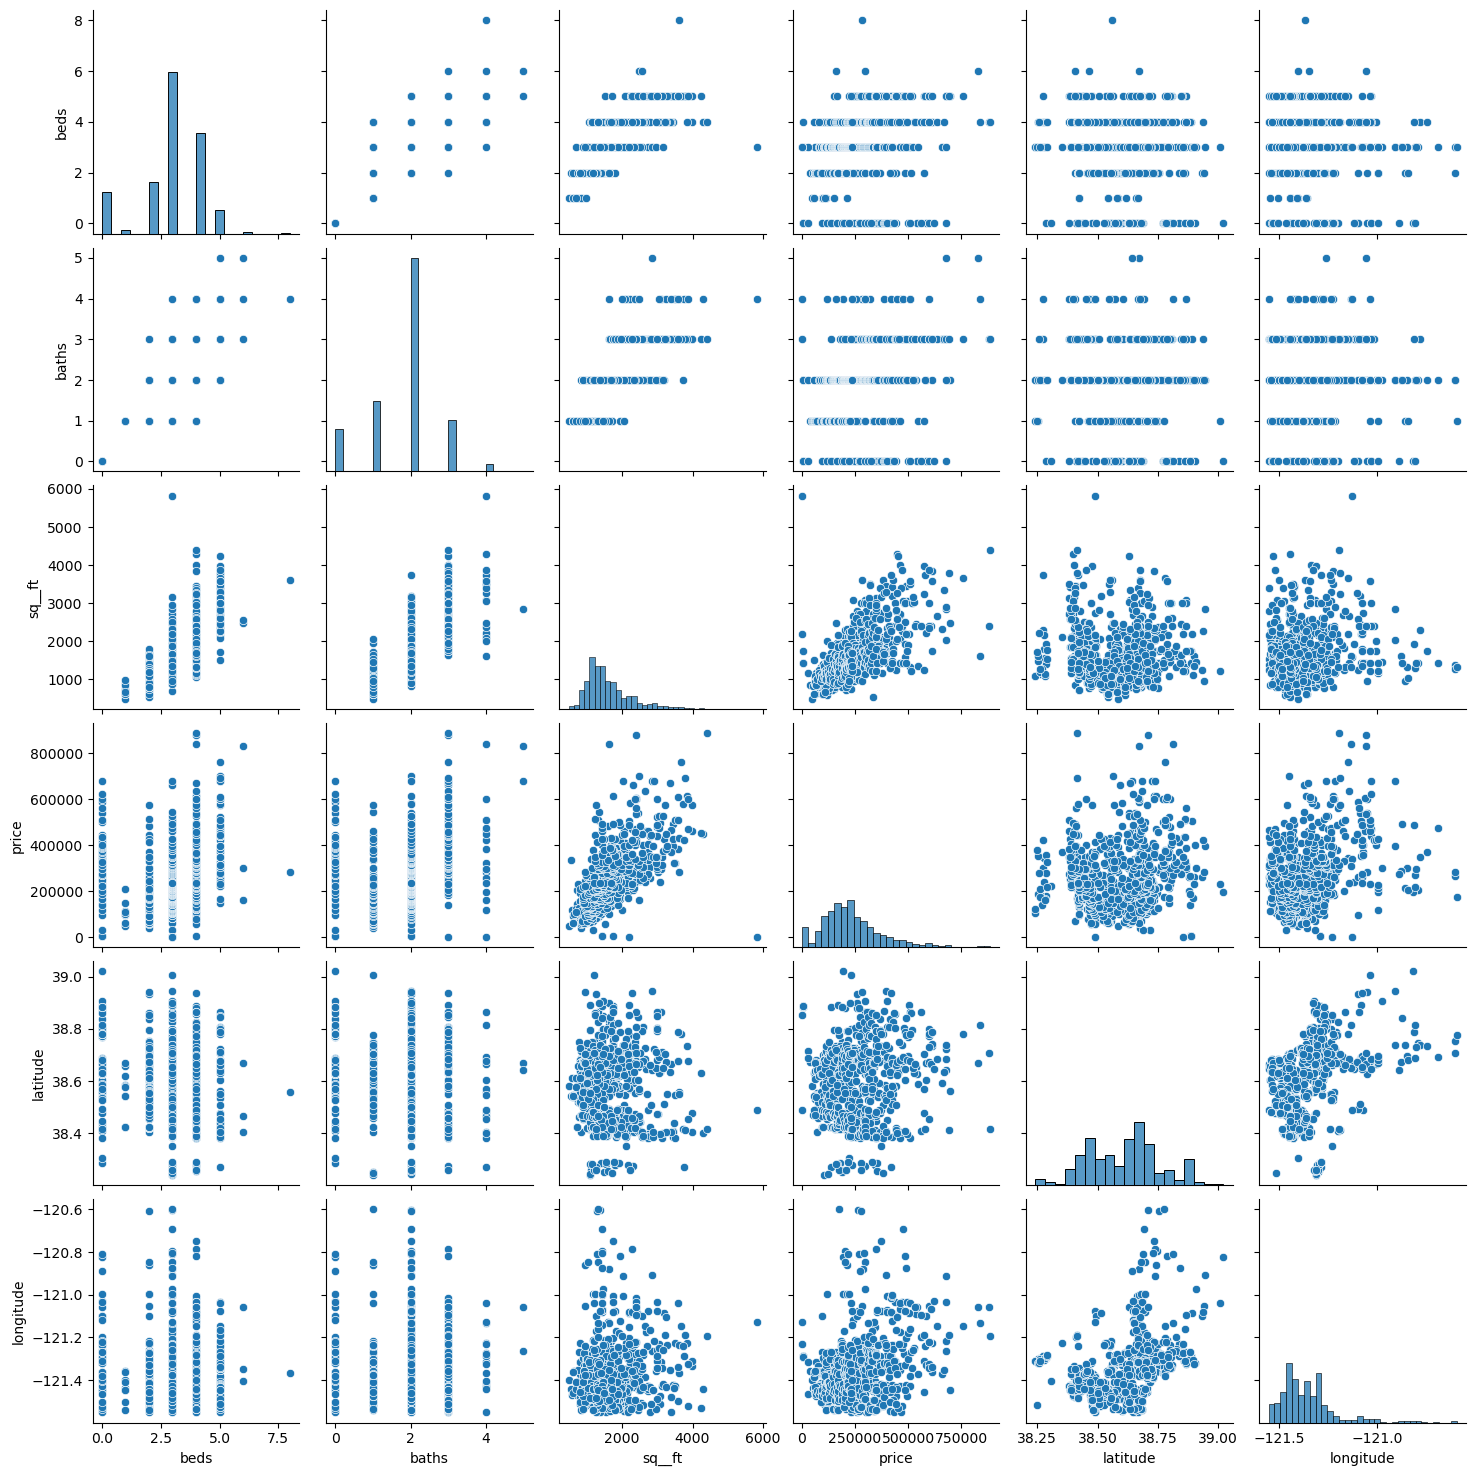

In [311]:
#sns pairplot to see high level correlation, histogram
sns.pairplot(df)
plt.show()

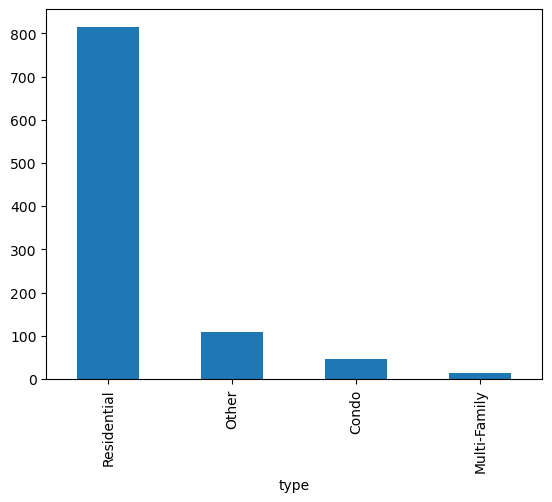

In [313]:
df['type'].value_counts().plot(kind='bar')
plt.show()

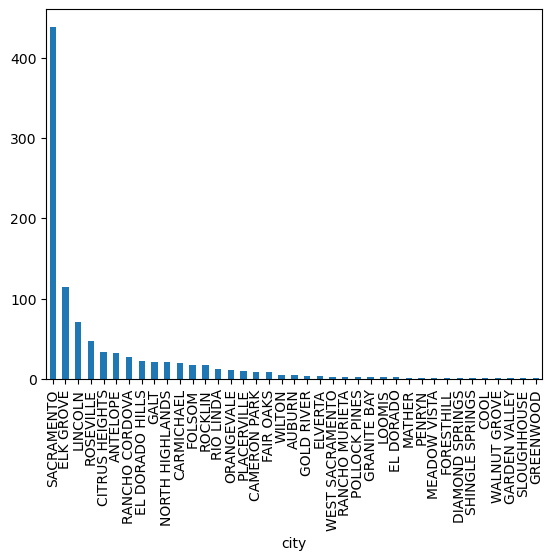

In [315]:
df['city'].value_counts().plot(kind='bar')
plt.show()

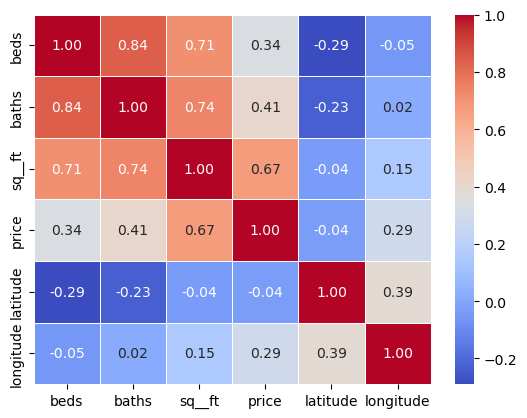

In [321]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

#sq_ft, beds, baths have the highest correlation to price, with sqft showing the most positive correlation. Beds, baths and sqft seem to be highly correlated with each other

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [243]:
# ANSWER
#The target variable is price because that is what we want to predict based on the different predictor variables/features.

#### 2.2 List all possible variables which might be Predictor variable.

In [245]:
# ANSWER

"""
Possible predictor variables could be sqft, beds, baths, type, city

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [331]:
# ANSWER
df.select_dtypes(include='number').corr()

#sq_ft is the best predictor with the highest positive correlation with price and also high correlation with beds and baths which are also good predictors of price

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.838975,0.711321,0.339651,-0.289491,-0.053933
baths,0.838975,1.000000,0.740507,0.413855,-0.233622,0.016891
sq__ft,0.711321,0.740507,1.000000,0.670799,-0.039031,0.149884
price,0.339651,0.413855,0.670799,1.000000,-0.036718,0.285433
latitude,-0.289491,-0.233622,-0.039031,-0.036718,1.000000,0.387394
longitude,-0.053933,0.016891,0.149884,0.285433,0.387394,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict the price of a house using the price values alone? (Hint: it is a simple calculation)



In [339]:
# ANSWER
#Easiet way is to get the mean or median price of the houses
df['y_mean']= df['price'].mean()
df['y_median']= df['price'].median()

/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_93118/2358416569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_mean']= df['price'].mean()
/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_93118/2358416569.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_median']= df['price'].median()


0      234614.979633
1      234614.979633
2      234614.979633
3      234614.979633
4      234614.979633
           ...      
980    234614.979633
981    234614.979633
982    234614.979633
983    234614.979633
984    234614.979633
Name: y_mean, Length: 982, dtype: float64

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [341]:
# ANSWER
res = abs(df['price'] - df['y_mean'])
res

0      175392.979633
1      166402.979633
2      165734.979633
3      165307.979633
4      152714.979633
           ...      
980      2189.979633
981       614.979633
982       385.020367
983       686.020367
984      1123.020367
Length: 982, dtype: float64

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable
- Y = Target Variable

In [363]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [365]:
# ANSWER
def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()

    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))

    beta_1 = n/d

    return beta_1

beta_1 = calculate_beta_1(X, Y)
beta_1

129.05706609957844

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [367]:
# ANSWER

def calculate_beta_0(X, Y):

    Xbar = X.mean()
    Ybar = Y.mean()

    beta_0 = Ybar - calculate_beta_1(X, Y) * Xbar

    return beta_0

beta_0 = calculate_beta_0(X, Y)
beta_0

25867.19883194726

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [369]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      133758.906091
1      176476.794970
2      128596.623447
3      135823.819149
4      128725.680513
           ...      
980    320117.309539
981    216484.485461
982    182800.591209
983    243328.355210
984    201642.922860
Name: sq__ft, Length: 982, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [371]:
# ANSWER

def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res
    
resi = calculate_residual(Y, Yhat)
abs(resi)

0       74536.906091
1      108264.794970
2       59716.623447
3       66516.819149
4       46825.680513
           ...      
980     87692.309539
981     17515.514539
982     52199.408791
983      8027.355210
984     34095.077140
Length: 982, dtype: float64

##### 2.7.E Find R-Squared

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{tot} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Squared value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [373]:
# ANSWER

def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [379]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.574836311665544

##### 2.7.F [BONUS] Draw Plot of Predicted Line

In [383]:
# ANSWER

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [389]:
# ANSWER
df['Yhat'] = Yhat

/var/folders/fq/m3ly0qjn561g7k3q37wzfjlw0000gn/T/ipykernel_93118/3536553733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yhat'] = Yhat


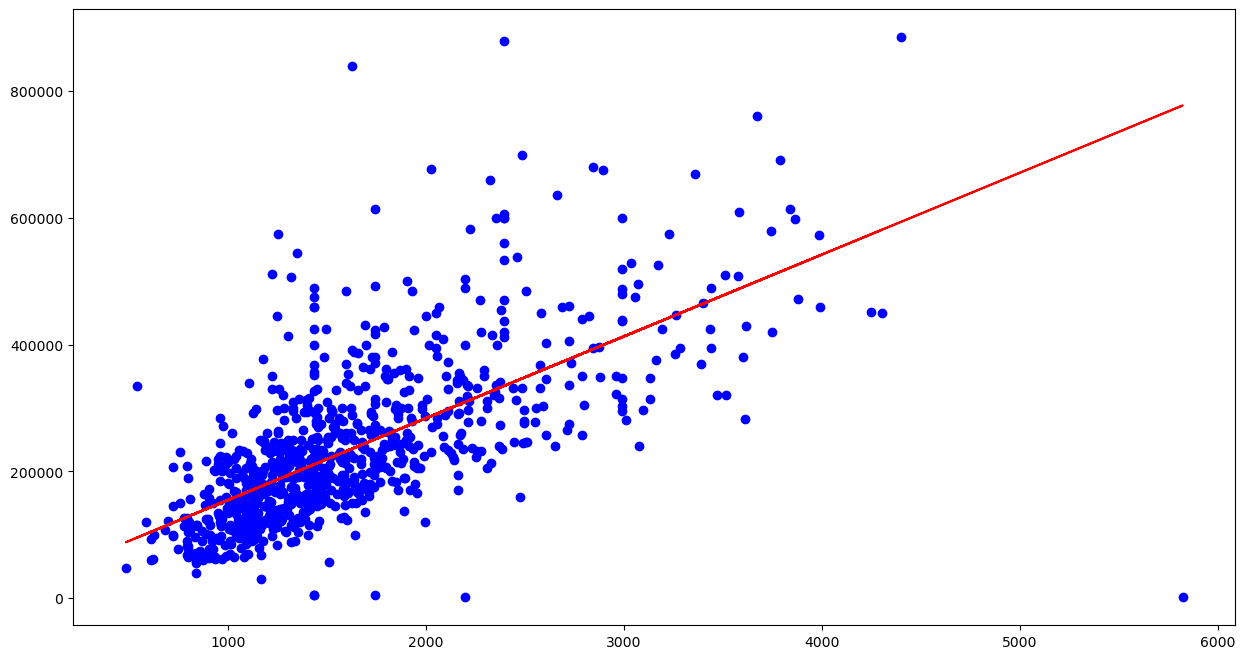

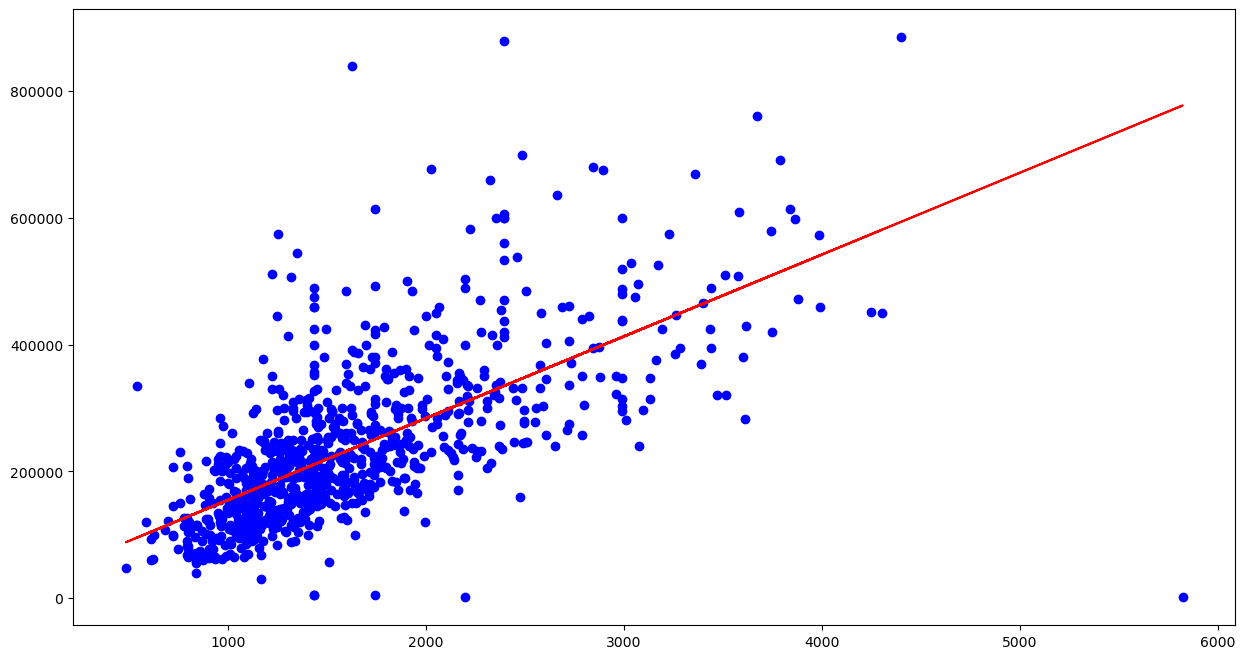

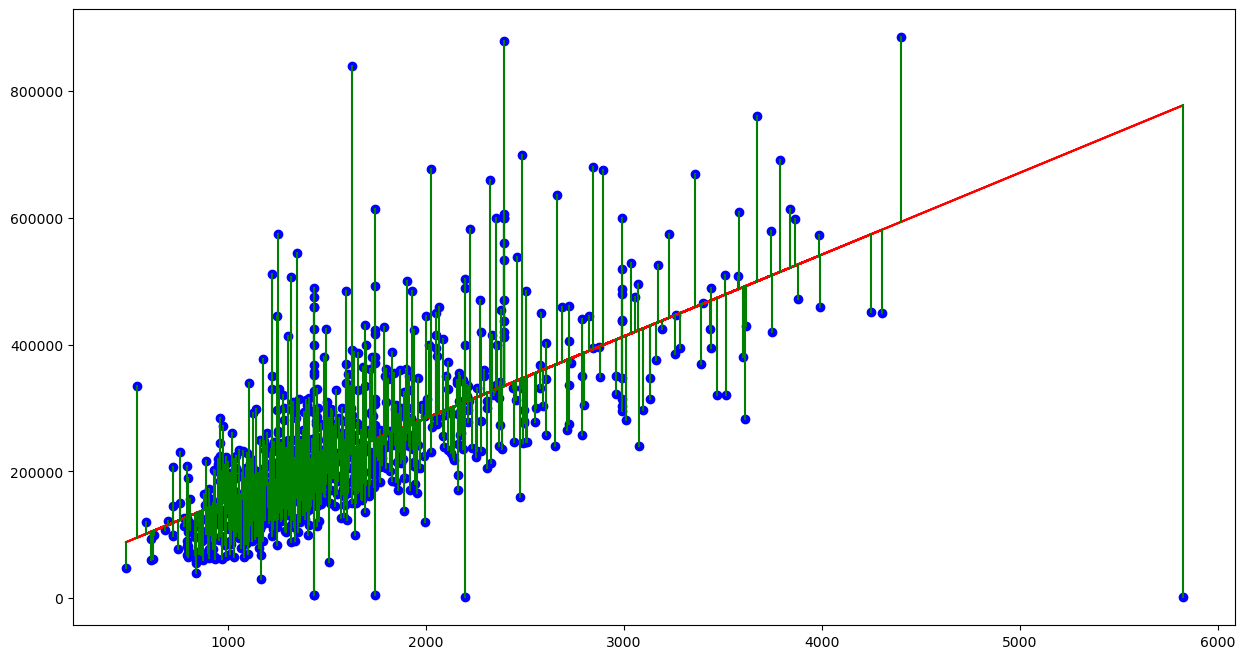

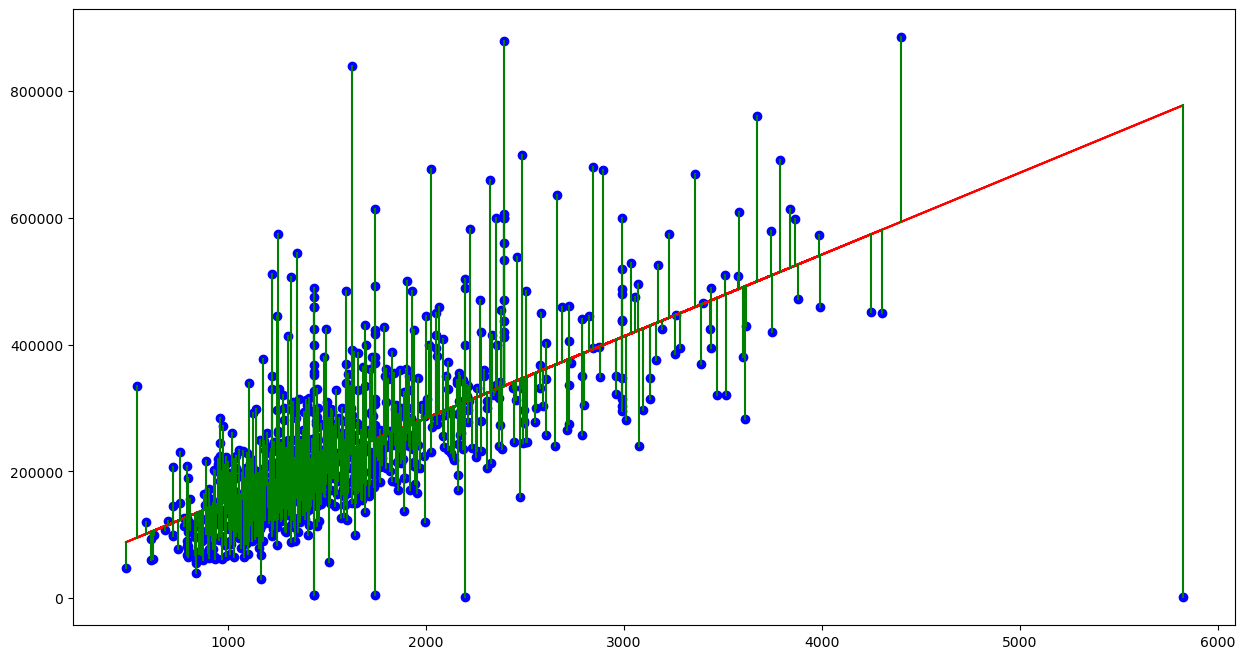

In [393]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in df.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

plt.show()

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [395]:
# ANSWER
xpred = 1204
Ypred = beta_1 * xpred + beta_0
Ypred


181251.9064158397



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



